In [117]:
import numpy as np
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'



from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.metrics import max_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import GridSearchCV

In [118]:
df= pd.read_csv('Data/main.csv')
df

,DATE,CSUSHPISA,MPRIME,CPIAUCSL,CSCICP03USM665S,USALORSGPNOSTSAM,T10YIEM,PI,POPTHM,DSPIC96,SPASTT01USM657N,UNRATE,Rent,Construction Spending,House Supply,New House Ownership
0,1/1/2003,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412.0,10133.6,-0.368127,5.8,203.200,423049.0,4.0,1049
1,2/1/2003,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606.0,10097.6,-6.280696,5.9,203.500,422705.0,4.5,1044
2,3/1/2003,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809.0,10121.5,-0.293998,5.9,204.000,418232.0,4.1,1044
3,4/1/2003,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024.0,10181.4,5.388649,6.0,204.500,425493.0,4.1,1043
4,5/1/2003,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250.0,10261.2,5.865718,6.1,205.000,426270.0,3.9,1047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,4/1/2023,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880.0,15633.0,2.863582,3.4,395.115,834713.0,7.6,1680
244,5/1/2023,302.657,8.23,303.294,97.177669,100.062858,2.21,22761.5,335013.0,15697.7,-1.785977,3.7,397.052,864027.0,7.2,1687
245,6/1/2023,304.635,8.25,303.841,97.489157,NaN,2.20,22822.8,335163.0,15701.3,2.280162,3.6,398.888,876684.0,7.5,1692
246,NaN,NaN,8.29,304.348,97.950268,NaN,2.30,22867.8,335329.0,15673.5,3.372091,3.5,400.566,889118.0,7.0,1691


In [119]:
main_df = df.copy()
main_df

,DATE,CSUSHPISA,MPRIME,CPIAUCSL,CSCICP03USM665S,USALORSGPNOSTSAM,T10YIEM,PI,POPTHM,DSPIC96,SPASTT01USM657N,UNRATE,Rent,Construction Spending,House Supply,New House Ownership
0,1/1/2003,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412.0,10133.6,-0.368127,5.8,203.200,423049.0,4.0,1049
1,2/1/2003,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606.0,10097.6,-6.280696,5.9,203.500,422705.0,4.5,1044
2,3/1/2003,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809.0,10121.5,-0.293998,5.9,204.000,418232.0,4.1,1044
3,4/1/2003,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024.0,10181.4,5.388649,6.0,204.500,425493.0,4.1,1043
4,5/1/2003,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250.0,10261.2,5.865718,6.1,205.000,426270.0,3.9,1047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,4/1/2023,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880.0,15633.0,2.863582,3.4,395.115,834713.0,7.6,1680
244,5/1/2023,302.657,8.23,303.294,97.177669,100.062858,2.21,22761.5,335013.0,15697.7,-1.785977,3.7,397.052,864027.0,7.2,1687
245,6/1/2023,304.635,8.25,303.841,97.489157,NaN,2.20,22822.8,335163.0,15701.3,2.280162,3.6,398.888,876684.0,7.5,1692
246,NaN,NaN,8.29,304.348,97.950268,NaN,2.30,22867.8,335329.0,15673.5,3.372091,3.5,400.566,889118.0,7.0,1691


In [120]:
main_df.dropna(inplace=True)

In [121]:
main_df['DATE'] = pd.to_datetime(main_df['DATE'])

main_df['YEAR'] = main_df['DATE'].dt.year
main_df['MONTH'] = main_df['DATE'].dt.month
main_df['QUARTER'] = main_df['DATE'].dt.quarter

main_df

,DATE,CSUSHPISA,MPRIME,CPIAUCSL,CSCICP03USM665S,USALORSGPNOSTSAM,T10YIEM,PI,POPTHM,DSPIC96,SPASTT01USM657N,UNRATE,Rent,Construction Spending,House Supply,New House Ownership,YEAR,MONTH,QUARTER
0,2003-01-01,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412.0,10133.6,-0.368127,5.8,203.200,423049.0,4.0,1049,2003,1,1
1,2003-02-01,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606.0,10097.6,-6.280696,5.9,203.500,422705.0,4.5,1044,2003,2,1
2,2003-03-01,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809.0,10121.5,-0.293998,5.9,204.000,418232.0,4.1,1044,2003,3,1
3,2003-04-01,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024.0,10181.4,5.388649,6.0,204.500,425493.0,4.1,1043,2003,4,2
4,2003-05-01,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250.0,10261.2,5.865718,6.1,205.000,426270.0,3.9,1047,2003,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-01-01,296.601,7.50,300.536,97.299665,99.994540,2.24,22432.0,334533.0,15504.7,2.671263,3.4,388.066,865778.0,8.1,1695,2023,1,1
241,2023-02-01,296.958,7.74,301.648,97.414405,100.014996,2.33,22520.6,334637.0,15545.3,0.830646,3.6,391.012,857211.0,8.4,1686,2023,2,1
242,2023-03-01,298.210,7.82,301.808,97.292142,100.031746,2.30,22605.1,334753.0,15598.6,-4.792700,3.5,392.930,856947.0,8.1,1680,2023,3,1
243,2023-04-01,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880.0,15633.0,2.863582,3.4,395.115,834713.0,7.6,1680,2023,4,2


In [122]:
col_name = {
    'MPRIME':'BANKLOAN_RATE',
    'CPIAUCSL':'CONSUMER_PRICE_INDEX',
    'CSCICP03USM665S':'CONSUMER_SENTIMENT_INDEX',
    'USALORSGPNOSTSAM':'GDP',
    'T10YIEM':'INFLATION_RATE',
    'PI':'PERSONAL_INCOME',
    'POPTHM':'POPULATION',
    'DSPIC96':'REAL_DISPOSABLE_PERSONAL_INCOME',
    'SPASTT01USM657N':'TOTAL_SHARE_PRICE',
    'UNRATE':'UNEMPLOYMENT_RATE',
    'CSUSHPISA':'HOUSE_PRICE_INDEX'
}

main_df.rename(columns= col_name, inplace=True)

main_df

,DATE,HOUSE_PRICE_INDEX,BANKLOAN_RATE,CONSUMER_PRICE_INDEX,CONSUMER_SENTIMENT_INDEX,GDP,INFLATION_RATE,PERSONAL_INCOME,POPULATION,REAL_DISPOSABLE_PERSONAL_INCOME,TOTAL_SHARE_PRICE,UNEMPLOYMENT_RATE,Rent,Construction Spending,House Supply,New House Ownership,YEAR,MONTH,QUARTER
0,2003-01-01,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412.0,10133.6,-0.368127,5.8,203.200,423049.0,4.0,1049,2003,1,1
1,2003-02-01,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606.0,10097.6,-6.280696,5.9,203.500,422705.0,4.5,1044,2003,2,1
2,2003-03-01,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809.0,10121.5,-0.293998,5.9,204.000,418232.0,4.1,1044,2003,3,1
3,2003-04-01,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024.0,10181.4,5.388649,6.0,204.500,425493.0,4.1,1043,2003,4,2
4,2003-05-01,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250.0,10261.2,5.865718,6.1,205.000,426270.0,3.9,1047,2003,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-01-01,296.601,7.50,300.536,97.299665,99.994540,2.24,22432.0,334533.0,15504.7,2.671263,3.4,388.066,865778.0,8.1,1695,2023,1,1
241,2023-02-01,296.958,7.74,301.648,97.414405,100.014996,2.33,22520.6,334637.0,15545.3,0.830646,3.6,391.012,857211.0,8.4,1686,2023,2,1
242,2023-03-01,298.210,7.82,301.808,97.292142,100.031746,2.30,22605.1,334753.0,15598.6,-4.792700,3.5,392.930,856947.0,8.1,1680,2023,3,1
243,2023-04-01,300.214,8.00,302.918,97.183635,100.047133,2.27,22669.7,334880.0,15633.0,2.863582,3.4,395.115,834713.0,7.6,1680,2023,4,2


In [123]:
main_df['POPULATION'] = main_df['POPULATION'] * 1000
main_df['POPULATION']

0      289412000.0
1      289606000.0
2      289809000.0
3      290024000.0
4      290250000.0
          ...     
240    334533000.0
241    334637000.0
242    334753000.0
243    334880000.0
244    335013000.0
Name: POPULATION, Length: 245, dtype: float64

In [124]:
# Correlation with House Price Index in Descending Order
main_df.corr()['HOUSE_PRICE_INDEX'].sort_values(ascending=False)

HOUSE_PRICE_INDEX                  1.000000
Construction Spending              0.893039
PERSONAL_INCOME                    0.853586
Rent                               0.846326
CONSUMER_PRICE_INDEX               0.829107
REAL_DISPOSABLE_PERSONAL_INCOME    0.781638
New House Ownership                0.764321
YEAR                               0.758989
POPULATION                         0.691565
BANKLOAN_RATE                      0.252750
House Supply                       0.157589
INFLATION_RATE                     0.132472
GDP                                0.006043
QUARTER                           -0.001017
MONTH                             -0.001117
TOTAL_SHARE_PRICE                 -0.045432
CONSUMER_SENTIMENT_INDEX          -0.170706
UNEMPLOYMENT_RATE                 -0.526346
Name: HOUSE_PRICE_INDEX, dtype: float64

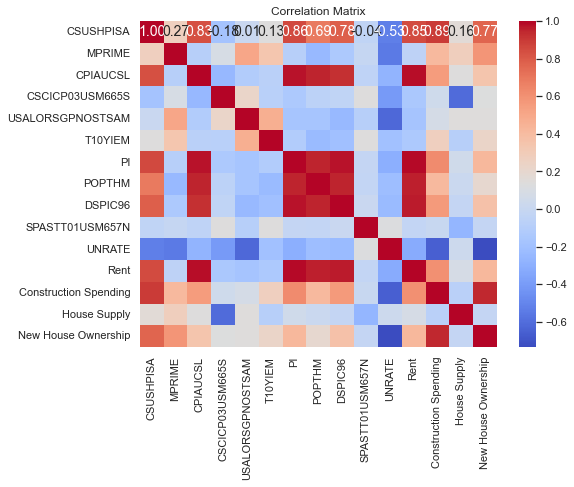

In [125]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [126]:
correlation_matrix

,CSUSHPISA,MPRIME,CPIAUCSL,CSCICP03USM665S,USALORSGPNOSTSAM,T10YIEM,PI,POPTHM,DSPIC96,SPASTT01USM657N,UNRATE,Rent,Construction Spending,House Supply,New House Ownership
CSUSHPISA,1.000000,0.272025,0.833650,-0.182569,0.006043,0.133788,0.856352,0.694098,0.783424,-0.039684,-0.529731,0.850234,0.894542,0.162587,0.768346
MPRIME,0.272025,1.000000,-0.090646,0.090648,0.506974,0.340136,-0.086503,-0.241902,-0.143970,-0.014245,-0.548075,-0.051525,0.410310,0.276944,0.584009
CPIAUCSL,0.833650,-0.090646,1.000000,-0.249145,-0.117204,-0.073599,0.977613,0.950234,0.923280,-0.044463,-0.281149,0.984165,0.557880,0.133859,0.345287
CSCICP03USM665S,-0.182569,0.090648,-0.249145,1.000000,0.223563,-0.078560,-0.141467,-0.058729,-0.041298,0.133005,-0.405342,-0.148171,0.042387,-0.611545,0.130761
USALORSGPNOSTSAM,0.006043,0.506974,-0.117204,0.223563,1.000000,0.466925,-0.172106,-0.168414,-0.243534,-0.085481,-0.625053,-0.178713,0.074587,0.140878,0.143489
T10YIEM,0.133788,0.340136,-0.073599,-0.078560,0.466925,1.000000,-0.116010,-0.235745,-0.203286,0.135202,-0.195206,-0.144502,0.270606,-0.089797,0.231618
PI,0.856352,-0.086503,0.977613,-0.141467,-0.172106,-0.116010,1.000000,0.952451,0.978706,-0.020233,-0.305411,0.991783,0.623077,0.048401,0.419834
POPTHM,0.694098,-0.241902,0.950234,-0.058729,-0.168414,-0.235745,0.952451,1.000000,0.948445,-0.024474,-0.217889,0.957488,0.412135,0.014003,0.193644
DSPIC96,0.783424,-0.143970,0.923280,-0.041298,-0.243534,-0.203286,0.978706,0.948445,1.000000,0.003733,-0.239507,0.960351,0.562625,-0.021924,0.363903
SPASTT01USM657N,-0.039684,-0.014245,-0.044463,0.133005,-0.085481,0.135202,-0.020233,-0.024474,0.003733,1.000000,0.121373,-0.027287,0.001722,-0.263526,-0.017941


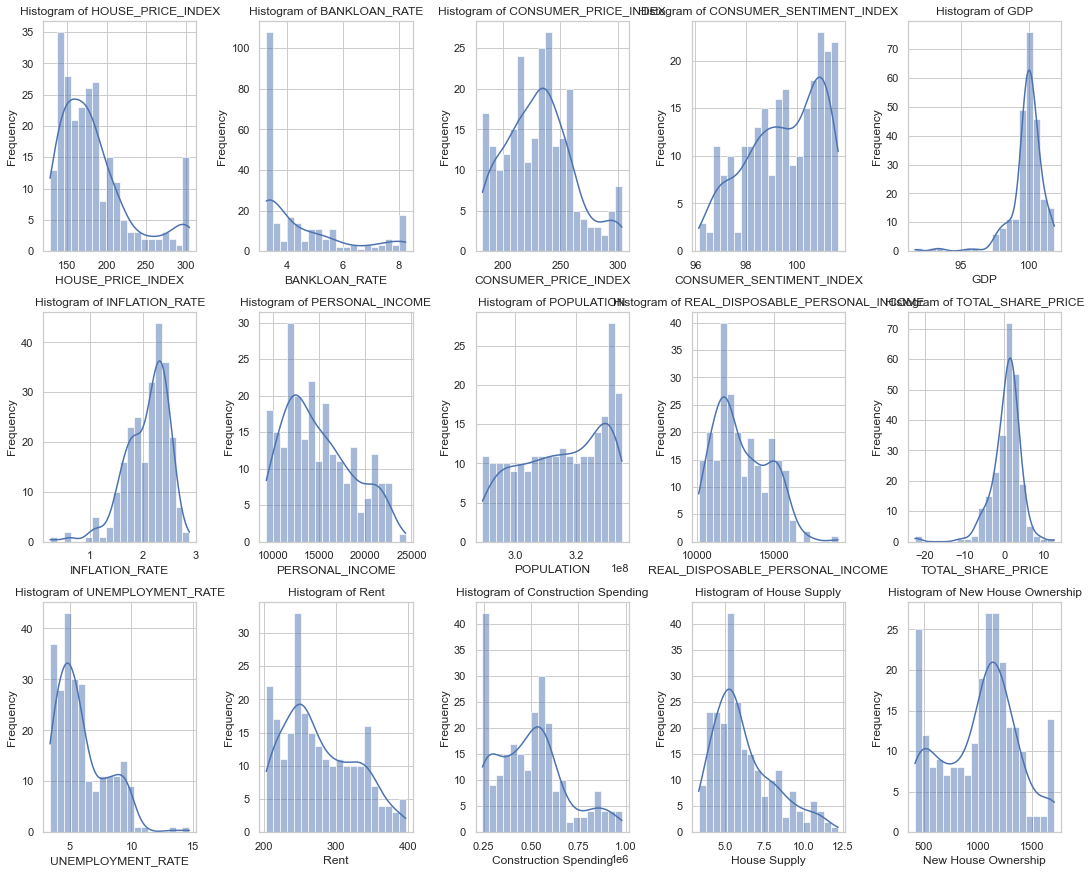

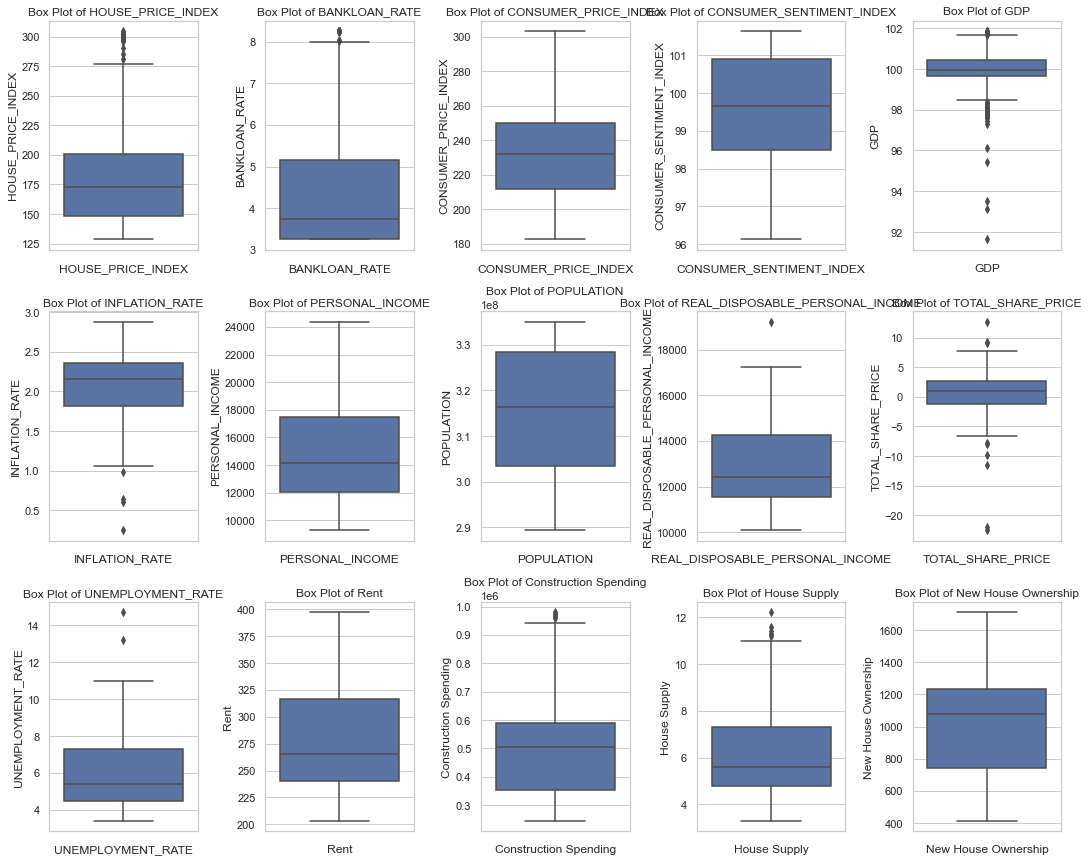

In [127]:
def visualize_data_distribution(dataframe, columns_to_visualize):

    # Set the style for Seaborn plots
    sns.set(style="whitegrid")

    # Calculate the number of rows for subplots
    num_columns = len(columns_to_visualize)
    num_rows = num_columns // 2 + num_columns % 2

    # Create histograms for selected columns
    plt.figure(figsize=(15, 4 * num_rows))
    for i, col in enumerate(columns_to_visualize):
        plt.subplot(num_rows, 5, i + 1)
        sns.histplot(dataframe[col], bins=20, kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Create box plots for selected columns
    plt.figure(figsize=(15, 4 * num_rows))
    for i, col in enumerate(columns_to_visualize):
        plt.subplot(num_rows, 5, i + 1)
        sns.boxplot(data=dataframe, y=col)
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

    # Create scatter plots for pairs of selected columns (assuming 2 columns)
    if len(columns_to_visualize) == 2:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=dataframe, x=columns_to_visualize[0], y=columns_to_visualize[1], alpha=0.5)
        plt.title(f'Scatter Plot: {columns_to_visualize[0]} vs. {columns_to_visualize[1]}')
        plt.xlabel(columns_to_visualize[0])
        plt.ylabel(columns_to_visualize[1])
        plt.grid(True)
        plt.show()


columns_to_visualize = ['HOUSE_PRICE_INDEX', 'BANKLOAN_RATE', 'CONSUMER_PRICE_INDEX',
       'CONSUMER_SENTIMENT_INDEX', 'GDP', 'INFLATION_RATE', 'PERSONAL_INCOME',
       'POPULATION', 'REAL_DISPOSABLE_PERSONAL_INCOME', 'TOTAL_SHARE_PRICE',
       'UNEMPLOYMENT_RATE', 'Rent', 'Construction Spending', 'House Supply',
       'New House Ownership']

visualize_data_distribution(main_df, columns_to_visualize)

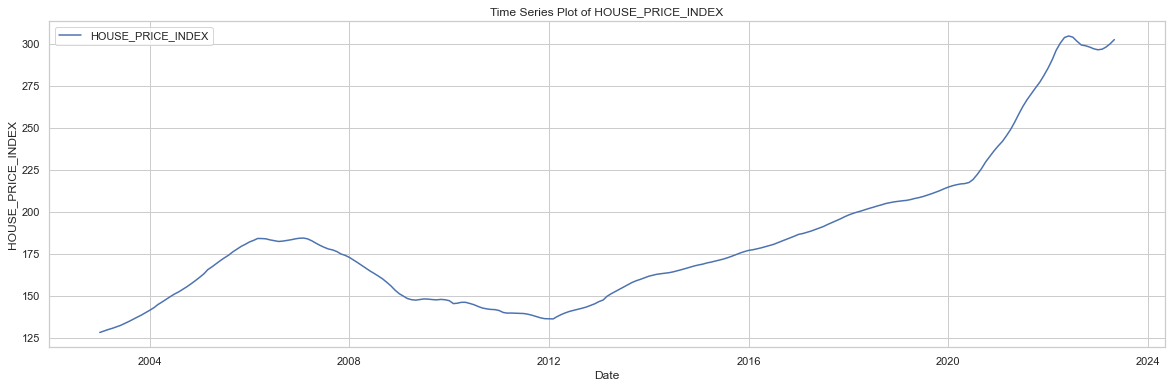

In [128]:
main_df['DATE'] = pd.to_datetime(main_df['DATE'])

# Set 'DATE' as the index for time series plotting
main_df.set_index('DATE', inplace=True)

# Plot the time series for HOUSE_PRICE_INDEX
plt.figure(figsize=(20, 6))
plt.plot(main_df.index, main_df['HOUSE_PRICE_INDEX'], label='HOUSE_PRICE_INDEX', color='b')
plt.title('Time Series Plot of HOUSE_PRICE_INDEX', )
plt.xlabel('Date')
plt.ylabel('HOUSE_PRICE_INDEX')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
main_df.columns

Index(['HOUSE_PRICE_INDEX', 'BANKLOAN_RATE', 'CONSUMER_PRICE_INDEX',
       'CONSUMER_SENTIMENT_INDEX', 'GDP', 'INFLATION_RATE', 'PERSONAL_INCOME',
       'POPULATION', 'REAL_DISPOSABLE_PERSONAL_INCOME', 'TOTAL_SHARE_PRICE',
       'UNEMPLOYMENT_RATE', 'Rent', 'Construction Spending', 'House Supply',
       'New House Ownership', 'YEAR', 'MONTH', 'QUARTER'],
      dtype='object')

In [132]:
# Removing Redundant Features
main_df.drop(columns=['YEAR', 'MONTH', 'QUARTER', 'REAL_DISPOSABLE_PERSONAL_INCOME'], inplace=True)
main_df

,HOUSE_PRICE_INDEX,BANKLOAN_RATE,CONSUMER_PRICE_INDEX,CONSUMER_SENTIMENT_INDEX,GDP,INFLATION_RATE,PERSONAL_INCOME,POPULATION,TOTAL_SHARE_PRICE,UNEMPLOYMENT_RATE,Rent,Construction Spending,House Supply,New House Ownership
DATE,,,,,,,,,,,,,,
2003-01-01,128.460,4.25,182.600,99.547162,98.340277,1.76,9297.2,289412000.0,-0.368127,5.8,203.200,423049.0,4.0,1049
2003-02-01,129.355,4.25,183.600,99.386673,98.332993,1.91,9302.0,289606000.0,-6.280696,5.9,203.500,422705.0,4.5,1044
2003-03-01,130.147,4.25,183.900,99.470983,98.371757,1.87,9341.7,289809000.0,-0.293998,5.9,204.000,418232.0,4.1,1044
2003-04-01,130.884,4.25,183.200,99.911101,98.457636,1.78,9369.8,290024000.0,5.388649,6.0,204.500,425493.0,4.1,1043
2003-05-01,131.734,4.25,182.900,100.345019,98.588511,1.66,9431.9,290250000.0,5.865718,6.1,205.000,426270.0,3.9,1047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,296.601,7.50,300.536,97.299665,99.994540,2.24,22432.0,334533000.0,2.671263,3.4,388.066,865778.0,8.1,1695
2023-02-01,296.958,7.74,301.648,97.414405,100.014996,2.33,22520.6,334637000.0,0.830646,3.6,391.012,857211.0,8.4,1686
2023-03-01,298.210,7.82,301.808,97.292142,100.031746,2.30,22605.1,334753000.0,-4.792700,3.5,392.930,856947.0,8.1,1680


In [147]:
inputs = main_df[['BANKLOAN_RATE', 'CONSUMER_PRICE_INDEX',
       'CONSUMER_SENTIMENT_INDEX', 'GDP', 'INFLATION_RATE', 'PERSONAL_INCOME',
       'POPULATION', 'TOTAL_SHARE_PRICE', 'UNEMPLOYMENT_RATE', 'Rent',
       'Construction Spending', 'House Supply', 'New House Ownership']]
target = main_df['HOUSE_PRICE_INDEX']

In [152]:
# Splitting the data 
X_temps, test_inputs, y_temps, test_target = train_test_split(inputs, target, test_size=0.1, random_state=42)

# Step 2: Split the temporary set into a training set (50%) and a validation set (20%)
train_inputs, val_inputs, train_target, val_target = train_test_split(X_temps, y_temps, test_size=0.15, random_state=42)

# Print the sizes of the resulting sets
print("Training set size:", len(train_inputs))
print("Validation set size:", len(val_inputs))
print("Test set size:", len(test_inputs))

Training set size: 187
Validation set size: 33
Test set size: 25


In [155]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_target, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_target, val_preds, squared=False)
    test_preds = model.predict(test_inputs)
    test_rmse = mean_squared_error(test_target, test_preds, squared=False)
    
    train_preds = model.predict(train_inputs)
    train_mae = mean_absolute_error(train_target, train_preds)
    val_preds = model.predict(val_inputs)
    val_mae = mean_absolute_error(val_target, val_preds)
    test_preds = model.predict(test_inputs)
    test_mae = mean_absolute_error(test_target, test_preds)

    train_preds = model.predict(train_inputs)
    train_r2 = r2_score(train_target, train_preds)
    val_preds = model.predict(val_inputs)
    val_r2 = r2_score(val_target, val_preds)
    test_preds = model.predict(test_inputs)
    test_r2 = r2_score(test_target, test_preds)

    print('RMSE(train,val,test):', train_rmse, val_rmse, test_rmse)
    print('MAE(train,val,test):', train_mae, val_mae, test_mae)
    print('r-sqared score(train,val,test):', train_r2, val_r2, test_r2)

In [156]:
def plot_actual_vs_predicted(model, train_inputs, val_inputs, test_inputs, train_target, val_target, test_target):
    # Make predictions on train, validation, and test sets
    train_pred = model.predict(train_inputs)
    val_pred = model.predict(val_inputs)
    test_pred = model.predict(test_inputs)

    # Calculate the Mean Squared Error for each dataset
    mse_train = mean_squared_error(train_target, train_pred)
    mse_val = mean_squared_error(val_target, val_pred)
    mse_test = mean_squared_error(test_target, test_pred)

    # Create three subplots for train, validation, and test set comparisons
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Train Set Comparison
    axes[0].plot(train_target, train_pred, c='blue', marker='o')
    axes[0].set_title(f'Train Set (MSE={mse_train:.2f})')

    # Validation Set Comparison
    axes[1].plot(val_target, val_pred, c='green', marker='x')
    axes[1].set_title(f'Validation Set (MSE={mse_val:.2f})')

    # Test Set Comparison
    axes[2].plot(test_target, test_pred, c='red', marker='s')
    axes[2].set_title(f'Test Set (MSE={mse_test:.2f})')

    for ax in axes:
        ax.plot(ax.get_xlim(), ax.get_xlim(), ls="--", c=".3")  # Add a diagonal line for reference

    plt.tight_layout()
    plt.show()

In [177]:
def plot_predictions_vs_targets(model, train_inputs, train_targets, val_inputs, val_targets, test_inputs, test_targets, title="Predictions vs. Targets"):
    train_predictions = model.predict(train_inputs)
    val_predictions = model.predict(val_inputs)
    test_predictions = model.predict(test_inputs)

    data_points_train = np.arange(len(train_targets))
    data_points_val = np.arange(len(val_targets)) + len(train_targets)
    data_points_test = np.arange(len(test_targets)) + len(train_targets) + len(val_targets)

    plt.figure(figsize=(25, 6))
    plt.plot(data_points_train, train_targets, label="Train Actual", marker='o', color='k')
    plt.plot(data_points_train, train_predictions, label="Train Predicted", marker='x', linestyle='--', color='blue', alpha=0.5)
    
    plt.plot(data_points_val, val_targets, label="Validation Actual", marker='o', color='k')
    plt.plot(data_points_val, val_predictions, label="Validation Predicted", marker='x', linestyle='--', color='green', alpha=0.5)
    
    plt.plot(data_points_test, test_targets, label="Test Actual", marker='o', color='k')
    plt.plot(data_points_test, test_predictions, label="Test Predicted", marker='x', linestyle='--', color='red', alpha=0.5)
    
    plt.xlabel("Data Points")
    plt.ylabel("Values")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Model Building & Evaluation

- Keeping Multi Collinear Variables in Mind

RMSE(train,val,test): 3.3361835009146197 3.029952037809769 2.655756679780848
MAE(train,val,test): 2.682683263544658 2.4172485436722884 2.1424196418206316
r-sqared score(train,val,test): 0.9946905974815357 0.9949752830384119 0.9912243652047745
None


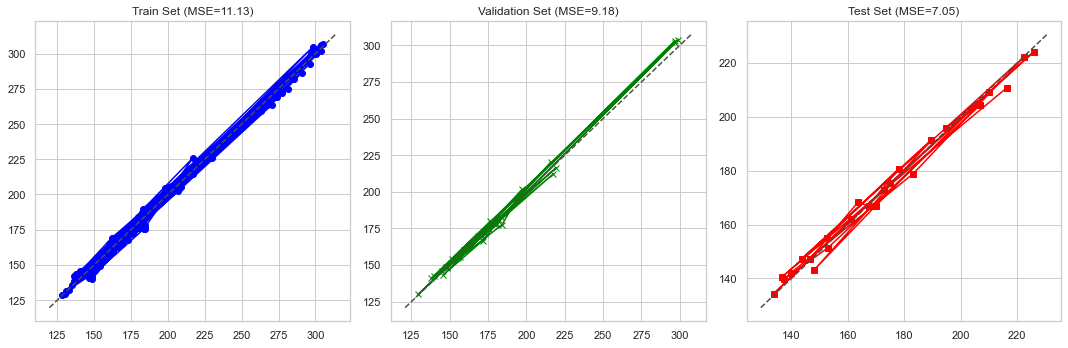

None


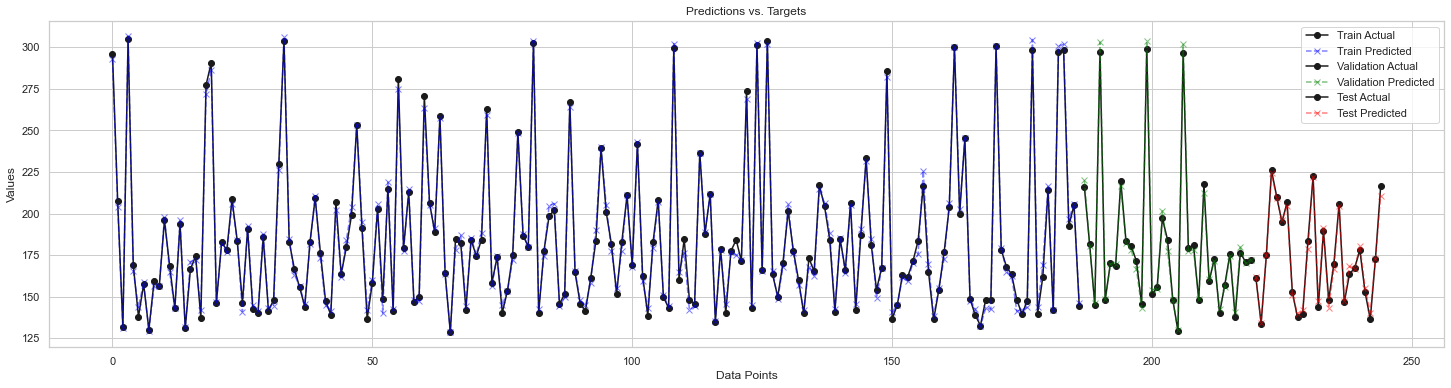

None


In [186]:
# Linear Regression

lr = LinearRegression().fit(train_inputs, train_target)
print(evaluate(lr))
print(plot_actual_vs_predicted(lr, train_inputs, val_inputs, test_inputs, train_target, val_target, test_target))
print(plot_predictions_vs_targets(lr, train_inputs, train_target, val_inputs, val_target, test_inputs, test_target, title="Predictions vs. Targets"))

Regularized Linear Models:

Ridge Regression: Ridge regression adds an L2 regularization term to the linear regression objective function. This regularization helps to reduce the coefficients of correlated variables and can effectively handle multicollinearity.

Lasso Regression: Lasso regression, on the other hand, uses L1 regularization and can perform both feature selection and multicollinearity reduction by setting some coefficients to zero.

Elastic Net Regression: Elastic Net combines L1 and L2 regularization, offering a balance between Ridge and Lasso. It's useful when you suspect multicollinearity and want to perform feature selection.

RMSE(train,val,test): 3.3364475421361424 3.027659706617496 2.6307697220895987
MAE(train,val,test): 2.6852080090585244 2.4242162258796283 2.1398147528187543
r-sqared score(train,val,test): 0.9946897570262053 0.994982883131185 0.9913887212805704
None


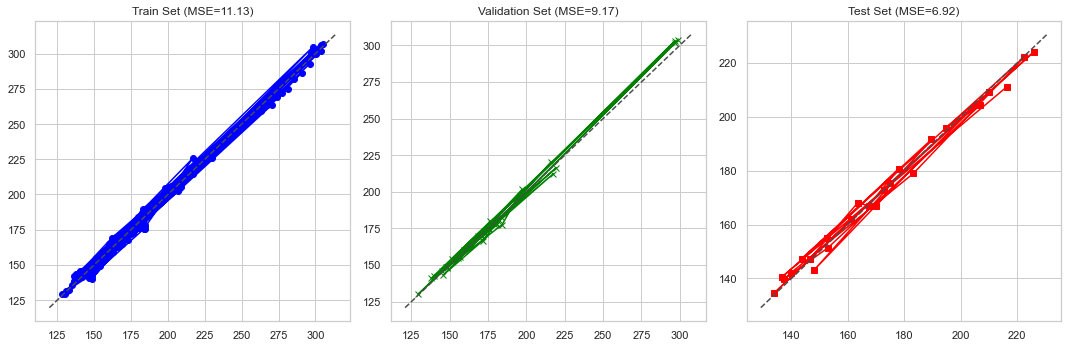

None


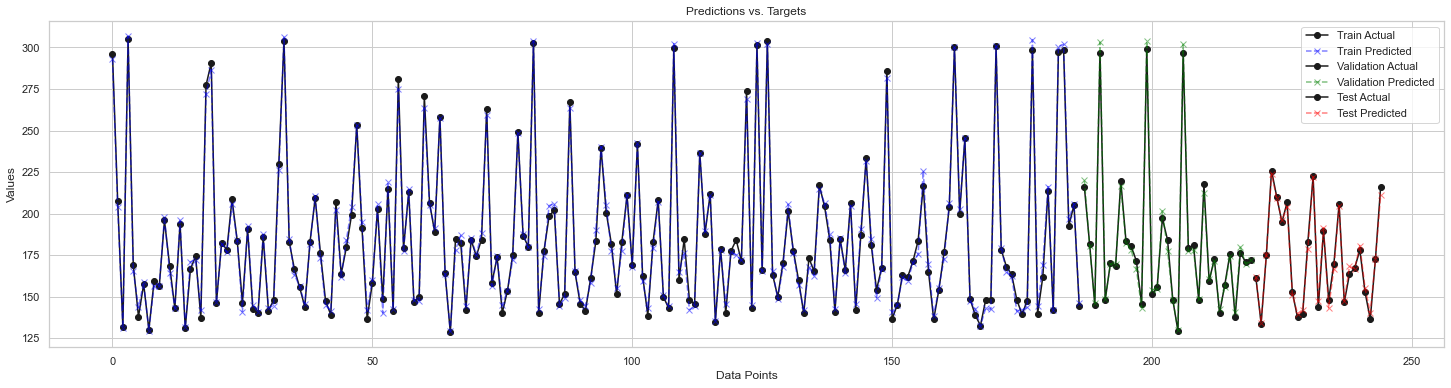

None


In [187]:
# Ridge
ridge = Ridge().fit(train_inputs, train_target)
print(evaluate(ridge))
print(plot_actual_vs_predicted(ridge, train_inputs, val_inputs, test_inputs, train_target, val_target, test_target))
print(plot_predictions_vs_targets(ridge, train_inputs, train_target, val_inputs, val_target, test_inputs, test_target, title="Predictions vs. Targets"))

c:\Users\14708\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.987e+03, tolerance: 3.920e+01
  model = cd_fast.enet_coordinate_descent(


RMSE(train,val,test): 3.627886882289781 3.3946175510117196 3.1770882212296203
MAE(train,val,test): 2.981385091609214 2.7728669635911327 2.7676446199990323
r-sqared score(train,val,test): 0.9937215380646974 0.9936930149724461 0.987440841962771
None


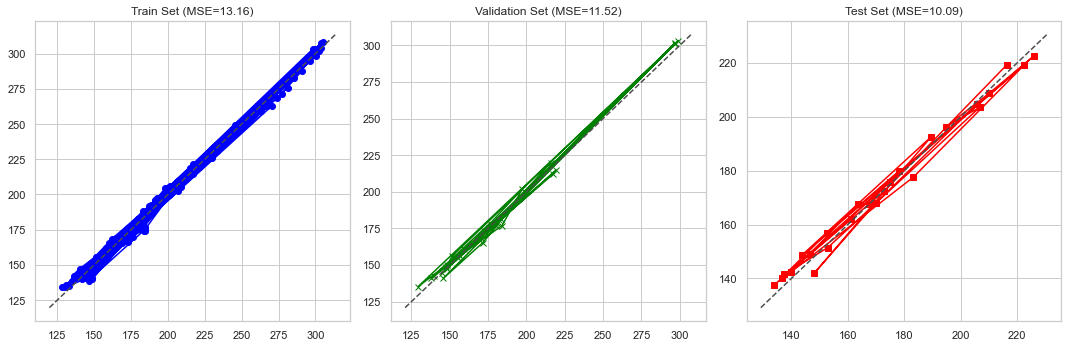

None


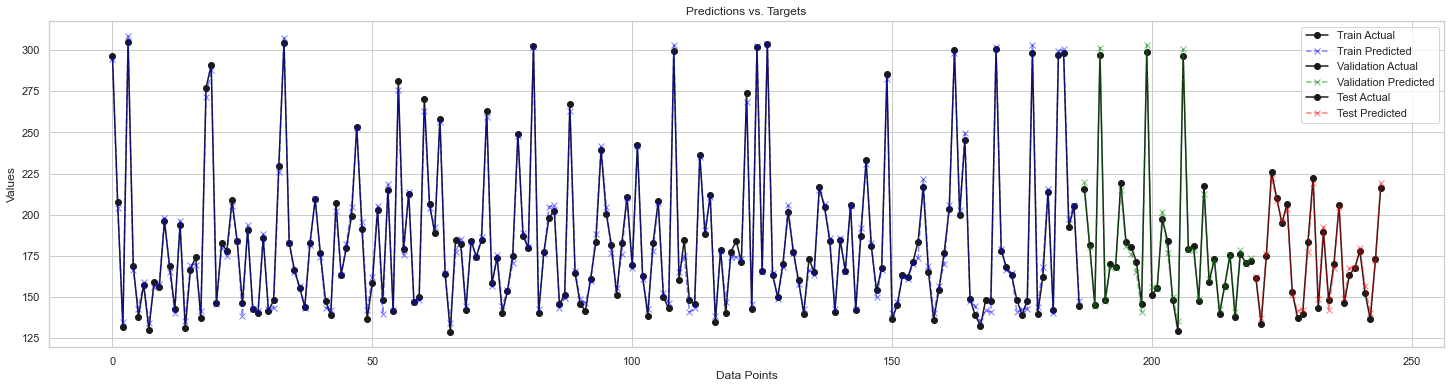

None


In [188]:
# Lasso
lasso = Lasso(random_state=42).fit(train_inputs, train_target)
print(evaluate(lasso))
print(plot_actual_vs_predicted(lasso, train_inputs, val_inputs, test_inputs, train_target, val_target, test_target))
print(plot_predictions_vs_targets(lasso, train_inputs, train_target, val_inputs, val_target, test_inputs, test_target, title="Predictions vs. Targets"))

c:\Users\14708\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.889e+03, tolerance: 3.920e+01
  model = cd_fast.enet_coordinate_descent(


RMSE(train,val,test): 3.698305989823527 3.6209589693416464 3.2502171241038558
MAE(train,val,test): 3.0291677651532845 3.0198412414922164 2.754007748307757
r-sqared score(train,val,test): 0.9934754363409564 0.9928239194862885 0.9868560249918268
None


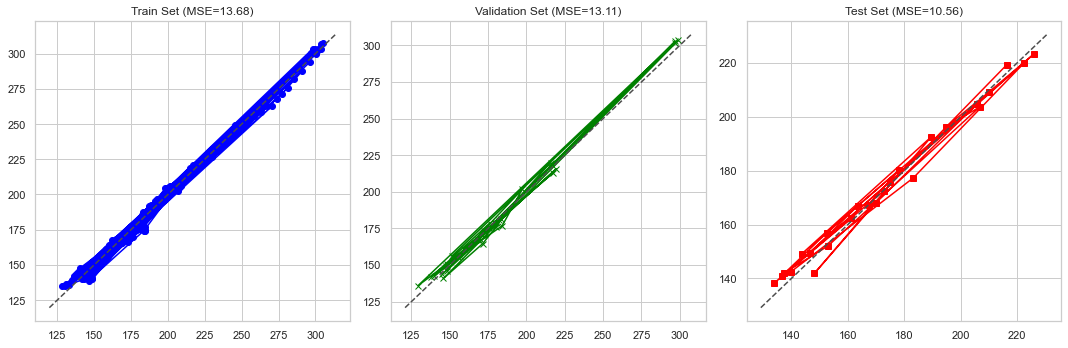

None


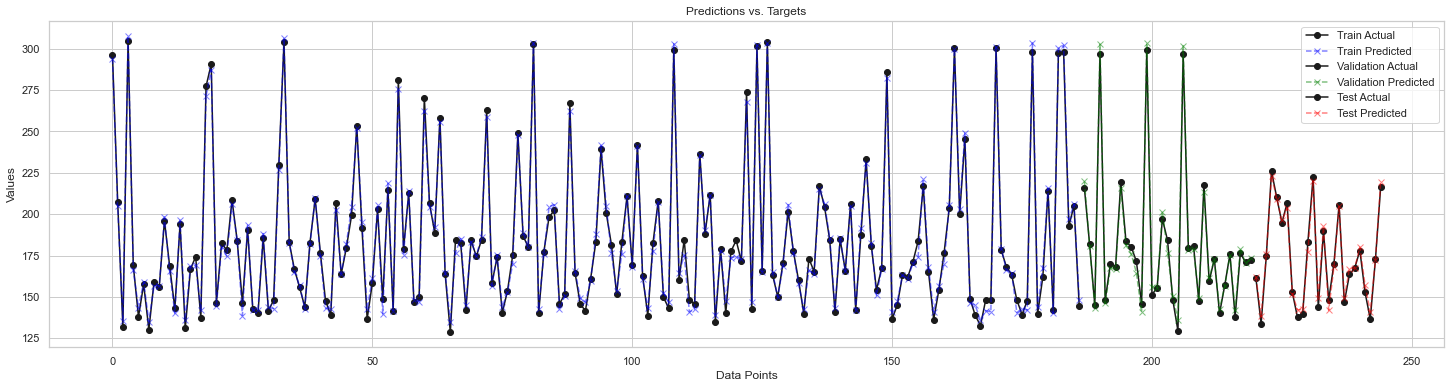

None


In [189]:
# Elastic Net 
en = ElasticNet(random_state=42).fit(train_inputs, train_target)
print(evaluate(en))
print(plot_actual_vs_predicted(en, train_inputs, val_inputs, test_inputs, train_target, val_target, test_target))
print(plot_predictions_vs_targets(en, train_inputs, train_target, val_inputs, val_target, test_inputs, test_target, title="Predictions vs. Targets"))